## 2 - Transforms

In [1]:
import torch, torchvision
import matplotlib.pyplot as plt
import numpy as np

def torch_imshow(img):
    img = img.permute(1, 2, 0)
    plt.imshow(img.cpu().numpy())
    plt.show()

---
Problem 1: We need to resize all images to the same size before sampling.

Solution: Torchvision has a `Resize` class in its transforms module. Use it with a size argument resize all images to the same dimension.

---

Problem 2: We also need to use `ToTensor` transform so we need to use more than one transform but `ImageFolder` (and most other datasets) accept a single transform as transform argument.

Solution: Torchvision also has a `Compose` class in the same module to stack transforms. It takes a `list` of transforms and composes a single transform using all transforms in the list so that we can pass a single transform to the dataset. The resulting transform object does nothing but applying the input transforms one after another. 


In [2]:
transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(size=(100, 100)),
        torchvision.transforms.ToTensor()
    ]
)

In [3]:
# enter the root of your dataset as root argument. 
# e.g. '/datasets/cats_dogs/test_set/'
cats_dogs = torchvision.datasets.ImageFolder(root = '../datasets/cats_dogs/training_set', transform=transforms)

In [4]:
print(cats_dogs)

Dataset ImageFolder
    Number of datapoints: 1600
    Root location: ../datasets/cats_dogs/training_set
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )


Sample a data from dataset and check the shape (dimensions)

In [5]:
img_label_pair = cats_dogs[0]

In [6]:
print(type(img_label_pair))

<class 'tuple'>


In [7]:
img, label = img_label_pair

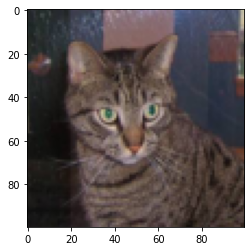

Shape: torch.Size([3, 100, 100])
Label: 0


In [8]:
torch_imshow(img)
print(f'Shape: {img.shape}')
print(f'Label: {label}')

All samples have same dimensions now. Let's try to creata a dataloader again to see if it can create batches from data now.

In [9]:
loader = torch.utils.data.DataLoader(cats_dogs, batch_size=4, shuffle=True)
# Note that transforms are "not" applied in DataLoader, but in the dataset sampling process.
# Dataloader takes transformed tensors.

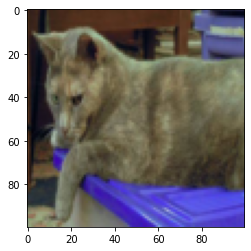

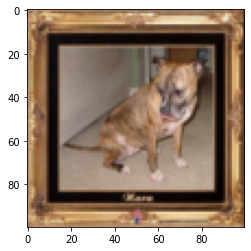

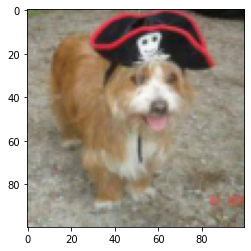

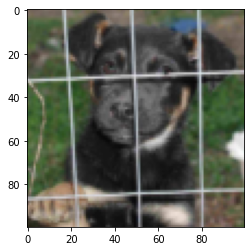

torch.Size([4, 3, 100, 100])


In [10]:
for images, labels in loader:
    torch_imshow(images[0])
    torch_imshow(images[1])
    torch_imshow(images[2])
    torch_imshow(images[3])
    print(images.shape)
    
    break #don't remove this line unless you want to visualize ALL images in the dataset.

---
Question: How can one do (possibly random) data augmentation using `torchvision.transforms`? Check documentation to find out.

https://pytorch.org/docs/stable/torchvision/transforms.html